<a href="https://colab.research.google.com/github/wvirany/NNGP/blob/main/NNGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomNormal

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid", {"axes.facecolor": ".95"})

In [ ]:
class SingleLayerNetwork(keras.Model):

  def __init__(self, num_units, activation='tanh'):

    super().__init__()

    self.net = Sequential([
        Dense(num_units, input_shape=(1,), activation=activation,
              kernel_initializer=RandomNormal(mean=0.0, stddev=5.0),
              bias_initializer=RandomNormal(mean=0.0, stddev=5.0)),
        Dense(1, activation='linear',
              kernel_initializer=RandomNormal(mean=0.0, stddev=1/np.sqrt(num_units)),
              bias_initializer=RandomNormal(mean=0.0, stddev=0.1))
    ])

  def call(self, X):
    return self.net(X)

## Experiment #1

In [ ]:
def nngp_exp1(num_units, inputs, num_samples=1000):

  x = []
  y = []

  for i in range(num_samples):
    net = SingleLayerNetwork(num_units=num_units)

    x.append(net(inputs[0]))
    y.append(net(inputs[1]))

  return x, y

In [ ]:
inputs = np.array([[-.2], [.4]])

In [ ]:
x1, y1 = nngp_exp1(1, inputs=inputs, num_samples=1000)
x2, y2 = nngp_exp1(3, inputs=inputs, num_samples=1000)
x3, y3 = nngp_exp1(10, inputs=inputs, num_samples=1000)

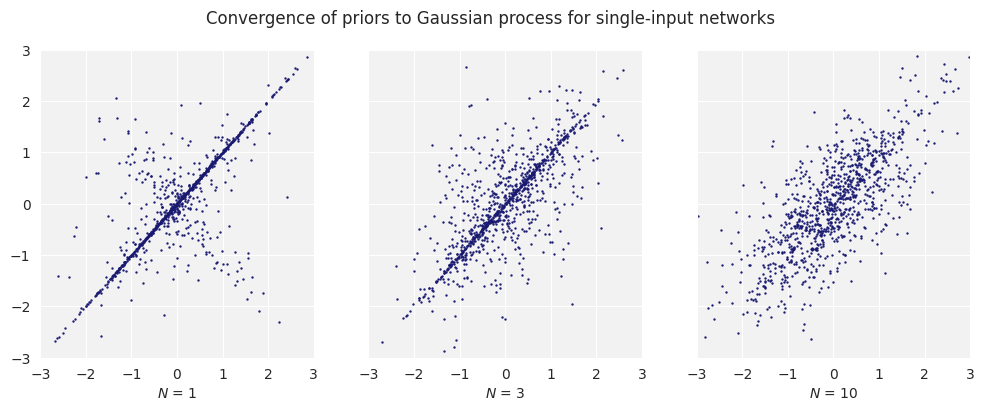

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True, figsize=(12, 4))

fig.suptitle('Convergence of priors to Gaussian process for single-input networks')

axes[0].set_xlim(-3, 3)
axes[0].set_ylim(-3, 3)

axes[0].scatter(x1, y1, s=.5, c='midnightblue')
axes[0].set_xlabel('$N$ = 1')
axes[1].scatter(x2, y2, s=.5, c='midnightblue')
axes[1].set_xlabel('$N$ = 3')
axes[2].scatter(x3, y3, s=.5, c='midnightblue')
axes[2].set_xlabel('$N$ = 10');